# Multivariate regression Closed form

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
main_df = pd.read_csv("insurance.csv")




#Use scikit learn
# column_to_label_encode = normalized_df["sex"]
# column_to_label_encode.head()

# label_encoder = LabelEncoder()
# label_encoded_column = label_encoder.fit_transform(column_to_label_encode)
# label_encoded_column


#Data Description

In [ ]:
main_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
main_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Checking for missing values

In [ ]:
main_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# One hot encoding

In [ ]:
column_names_to_one_hot = ["sex", "smoker", "region"]

In [ ]:
main_df = pd.get_dummies(main_df, columns=column_names_to_one_hot)

In [ ]:
main_df.loc[:20,:]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [ ]:
main_df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

# Checking for duplicate rows

In [ ]:
main_df.index[main_df.duplicated()]
main_df.duplicated().sum()

1

In [ ]:
main_df.drop(axis="rows", labels=main_df.index[main_df.duplicated()], inplace=True)

In [ ]:
main_df.duplicated().sum()

0

# Normalization

In [ ]:
normalized_df=(main_df-main_df.min())/(main_df.max()-main_df.min())

In [ ]:
normalized_df =  (main_df-main_df.min())/(main_df.max()-main_df.min())
np.random.shuffle(normalized_df.values)

In [ ]:
X = normalized_df.drop(axis="columns", labels="charges").to_numpy().astype(np.float64)
y = normalized_df["charges"].to_numpy().astype(np.float64)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

In [ ]:
len(X)

1337

In [ ]:
len(y)

1337

# Train test split

In [ ]:
train_num = int(1337*.8)

In [ ]:
train_X,test_X = X[train_num:], X[:train_num]
train_y, test_y = y[train_num:], y[:train_num]

In [ ]:
train_X


array([[1.        , 0.41304348, 0.25813828, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43478261, 0.38337369, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.39130435, 0.26741996, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.97826087, 0.19168684, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.82608696, 0.63599677, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.26086957, 0.1865752 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6)

In [ ]:
train_X

array([[1.        , 0.41304348, 0.25813828, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43478261, 0.38337369, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.39130435, 0.26741996, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.97826087, 0.19168684, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.82608696, 0.63599677, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.26086957, 0.1865752 , ..., 0.        , 0.        ,
        0.        ]])

# Closed form solution

In [ ]:
coeffs = np.linalg.pinv(train_X.transpose().dot(train_X)).dot(train_X.transpose()).dot(train_y)

In [ ]:
def predict(X):
    preds = np.dot(X, coeffs)
    
    return preds

Graph

Text(0, 0.5, 'y - target / true')

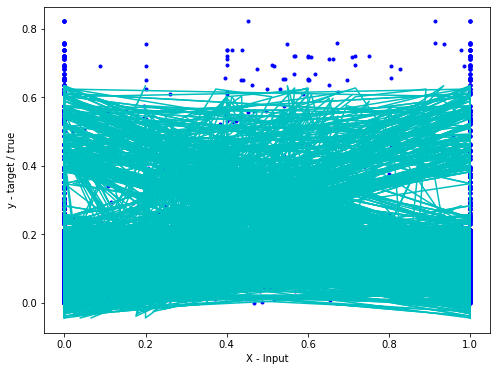

In [ ]:

preds = predict(train_X)
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(train_X, train_y, 'b.')
plt.plot(train_X, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target / true')

MSE

In [ ]:
((test_y-(test_X).dot(coeffs)).transpose()).dot(test_y-(test_X).dot(coeffs))/test_y.size

0.00998876416711209